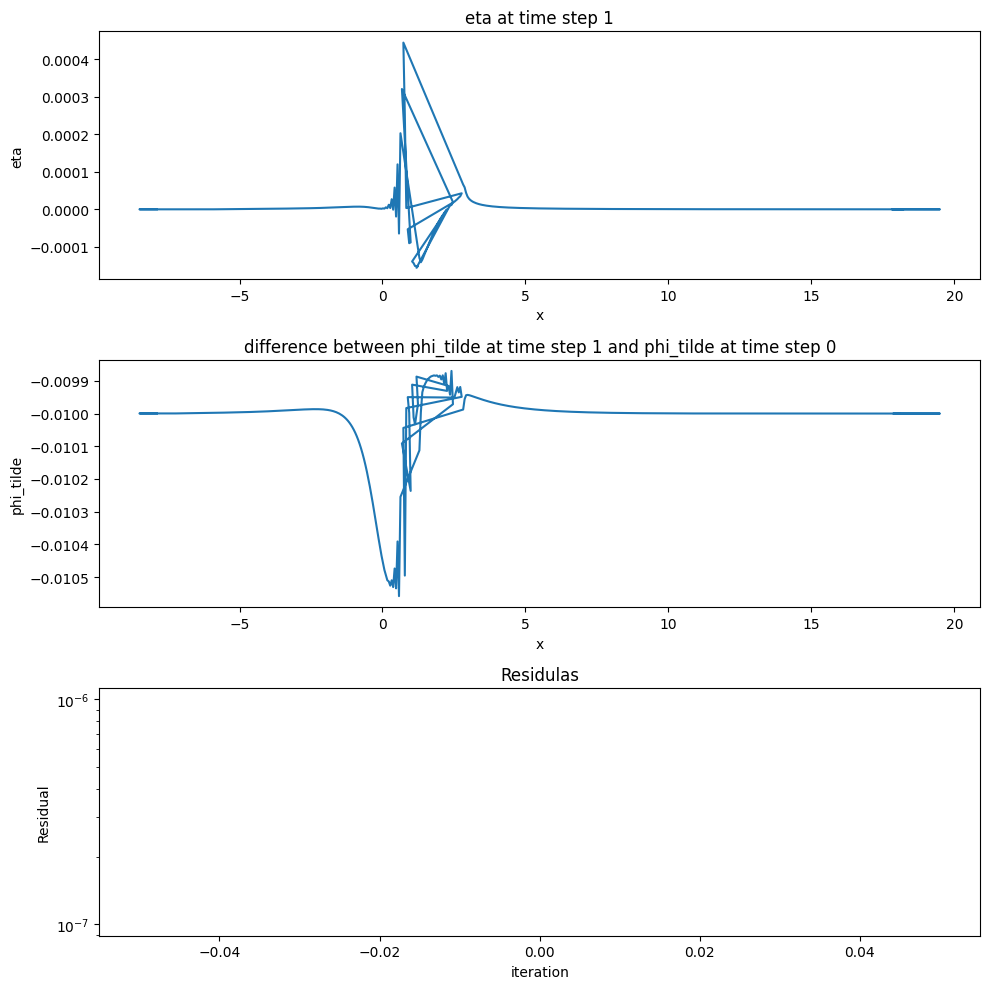

In [7]:
import matplotlib.pyplot as plt
import numpy as np

eta = np.load("./arrays/eta.npy")
phi = np.load("./arrays/phiTilde.npy")
fs_xs = np.load("./arrays/coordsFS.npy")
residuals = np.load("./arrays/residuals.npy")
residuals, time_step = residuals[:,0], residuals[:,1]

fig, ax = plt.subplots(3, 1, figsize = (10,10))

try:
    time = np.where(time_step == 0)[0][0] - 1
except:
    time = len(time_step) - 1

time = 1

height_of_FS = eta[0][0]
ax[0].plot(fs_xs[time][:], eta[time][:]-height_of_FS)
if time - 50 > 0:
    ax[0].plot(fs_xs[time-10][:], eta[time-10][:] - 1, alpha = 0.7, linestyle = "--")
    ax[0].plot(fs_xs[time-50][:], eta[time-50][:] - 1, alpha = 0.5, linestyle = "--")

ax[0].set_title(f"eta at time step {time}" )
ax[0].set_xlabel("x")
ax[0].set_ylabel("eta")

init_phi = phi[0]
ax[1].plot(fs_xs[0], phi[time]-init_phi)
if time - 50 > 0:
    ax[1].plot(fs_xs[0], phi[time-10], alpha = 0.7, linestyle = "--")
    ax[1].plot(fs_xs[0], phi[time-50], alpha = 0.5, linestyle = "--")
ax[1].set_title(f"difference between phi_tilde at time step {time} and phi_tilde at time step 0" )
ax[1].set_xlabel("x")
ax[1].set_ylabel("phi_tilde")

ax[2].plot(residuals[:time])
ax[2].set_title("Residulas")
ax[2].set_xlabel("iteration")
ax[2].set_ylabel("Residual")
ax[2].set_yscale("log")

plt.tight_layout()
plt.show()

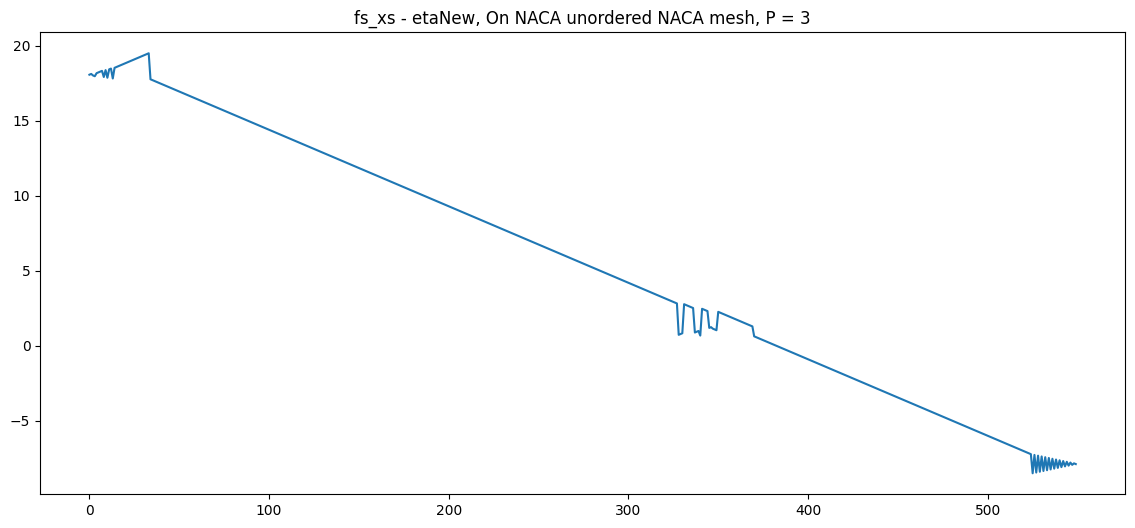

In [2]:
fig, ax = plt.subplots(1, 1, figsize = (14,6))
time = 0
ax.plot(fs_xs[0])
#ax.plot(np.linspace(-8,27, len(fs_xs[time])), np.sin(np.linspace(-8,27, len(fs_xs[time]))), linestyle = "--")
ax.set_title(f"fs_xs - etaNew, On NACA unordered NACA mesh, P = 3")
# ax.set_xlim(5,10)
plt.show()

In [3]:
np.sin(fs_xs[0]/(8+27))

array([ 4.93701780e-01,  4.94968429e-01,  4.92434086e-01,  4.91165281e-01,
        4.96234175e-01,  4.97498760e-01,  4.98762278e-01,  5.00024766e-01,
        4.89895431e-01,  5.01286182e-01,  4.88624566e-01,  5.02546529e-01,
        5.03805814e-01,  4.87352654e-01,  5.05064030e-01,  5.06321169e-01,
        5.07577237e-01,  5.08832226e-01,  5.10086134e-01,  5.11338959e-01,
        5.12590699e-01,  5.13841350e-01,  5.15090910e-01,  5.16339376e-01,
        5.17586746e-01,  5.18833017e-01,  5.20078186e-01,  5.21322251e-01,
        5.22565208e-01,  5.23807056e-01,  5.25047793e-01,  5.26287415e-01,
        5.27525915e-01,  5.28763302e-01,  4.86079706e-01,  4.84805726e-01,
        4.83530718e-01,  4.82254682e-01,  4.80977623e-01,  4.79699542e-01,
        4.78420442e-01,  4.77140327e-01,  4.75859198e-01,  4.74577059e-01,
        4.73293913e-01,  4.72009761e-01,  4.70724607e-01,  4.69438454e-01,
        4.68151303e-01,  4.66863159e-01,  4.65574023e-01,  4.64283899e-01,
        4.62992789e-01,  

import firedrake as fd

P =3
mesh = fd.UnitSquareMesh(100, 100)
V = fd.FunctionSpace(mesh, "CG", P)
V1 = fd.FunctionSpace(mesh, "CG", 1)
fSIndecies = V.boundary_nodes(4)
coordsFS = (fd.Function(fd.VectorFunctionSpace(mesh, "CG", P)).interpolate(mesh.coordinates).dat.data)[fSIndecies,:]
fsMesh = fd.IntervalMesh(len(fSIndecies)-1, 0, 1)
fsMesh.coordinates.dat.data[:] = coordsFS[:,0]

Vfs = fd.FunctionSpace(fsMesh, "CG", 1)
eta = fd.Function(Vfs)
eta.dat.data[:] = coordsFS[:,1]

newEta = fd.Function(Vfs)
newEta.dat.data[:] = np.sin(2*3.14*coordsFS[:,0])

coords = mesh.coordinates.dat.data[:]
M = 0.5
coordsMask = coords[:, 1] > M

eta2d = np.interp(coords[coordsMask,0], fsMesh.coordinates.dat.data[:], eta.dat.data[:])
newEta2d = np.interp(coords[coordsMask,0], fsMesh.coordinates.dat.data[:], newEta.dat.data[:])

coords[coordsMask, 1] = M + (newEta2d - M)/(eta2d - M) * (coords[coordsMask, 1] - M)
mesh.coordinates.dat.data[:] = coords

plt.plot(coordsFS[::3,0], coords[V1.boundary_nodes(4), 1])
